In [1]:
import pandas as pd

In [2]:
astrazeneca = pd.read_csv("../data/India/vaccination/vaccine types/astrazeneca.csv")
astrazeneca.drop(columns = ["Datetime", "Username"], inplace = True)
astrazeneca

,Tweet Id,Text
0,1491902581794353157,AstraZeneca sees $4B in COVID vaccine sales as...
1,1491883421781700613,"Covid Product Sales, Profit Margins Would Drop..."
2,1491865865570373637,"@JNJNews, @Roche, and @nvidia accounts for 52...."
3,1491842664018239491,AstraZeneca warns of falling Covid treatment s...
4,1491832461822926848,AstraZeneca forecasts higher 2022 sales after ...
...,...,...
4349,1335890559978749952,#SerumInstitute Seeks #DCGI Approval For Emerg...
4350,1335833595609419776,#Serum #Institute of #India ( #SII) in #Pune h...
4351,1335121109440557056,Anti-vaccine conspiracies will use this now to...
4352,1333998420139229189,Wonder how much it will cost for the governmen...


In [3]:
bharat_biotech = pd.read_csv("../data/India/vaccination/vaccine types/bharat_biotech.csv")
bharat_biotech.drop(columns = ["Datetime", "Username"], inplace = True)
bharat_biotech

,Tweet Id,Text
0,1490641574132391936,@Turrialba27 @BharatBiotech @nytimes @USATODAY...
1,1490333756456333318,@marunk1982 But now #Muqeem doesnt give 28 day...
2,1475158028332711946,@sumanthraman @rupagulab @SerumInstIndia @Bhar...
3,1453684383265738756,@hvgoenka Thought provoking message from soft...
4,1448204618899591169,@narendramodi @PMOIndia @mansukhmandviya @Offi...
5,1422272677419552773,@BesuraTaansane @SreenivasanJain @MoHFW_INDIA ...
6,1408715909276045314,drugs for Covid-19 treatment without any scien...
7,1396754374219685894,It has nothing to do with Indian right wing -G...
8,1396237776186712065,"Moderna is selling 30 US dollars per dose, Pfi..."
9,1390568807966691328,@KolaVenkateswa9 @SuchitraElla @BharatBiotech ...


In [4]:
covaxin = pd.read_csv("../data/India/vaccination/vaccine types/covaxin_bharat_biotech.csv")
covaxin.drop(columns = ["Datetime", "Username"], inplace = True)
covaxin

,Tweet Id,Text
0,1491519752287760384,@Ty22689739 @Ocugen @pfizer @US_FDA @DrWoodcoc...
1,1491519293099593730,@Ocugen Where we are at with the tech transfer...
2,1491212911943249920,"I hope the criminals from @fda Pfizer, Oderna,..."
3,1490904427514908675,$OCGN most people I know are done with getting...
4,1490760152592564241,@DrEliDavid Useless MRNA from Dr Fauci lier do...
5,1490732618471596037,@Ocugen We're waiting for the final decision f...
6,1490719046425321478,Corrupted @fda release #Covaxin approval. Mf
7,1490333756456333318,@marunk1982 But now #Muqeem doesnt give 28 day...
8,1490099687713644548,@RepThomasMassie @US_FDA @pfizer What about #C...
9,1490099153086689283,"@POTUS #Covaxin recognition, bring it on!"


In [13]:
covishield = pd.read_csv("../data/India/vaccination/vaccine types/covishield.csv")
covishield.drop(columns = ["Datetime", "Username"], inplace = True)
covishield

,Tweet Id,Text
0,1491796672489594886,Worn mask for way too much time which has made...
1,1491790620876161028,Date-11/02/2022\n\nTime - 9.00am to 5.00pm\n\n...
2,1491782116828323848,@EdzardErnst All who took covishield vaccine g...
3,1491777268854964227,SW delhi has at least 28102 new slots availabl...
4,1491771663134126086,@Thamizhan74 This is less safe I think- the Ja...
...,...,...
10956,1335795367254716417,बड़ी खबर : कोरोना वैक्सीन Covishield के लिए सी...
10957,1335722856714391554,सीरम इंस्टीट्यूट ने Covishield के आपात इस्तेमा...
10958,1335656138310701062,#Good_news\nSerum Institute seeks emergency us...
10959,1334412645085036544,UK is getting Pfizer's COVID-19 vaccine next w...


In [5]:
covovax = pd.read_csv("../data/India/vaccination/vaccine types/covovax.csv")
covovax.drop(columns = ["Datetime", "Username"], inplace = True)
covovax

,Tweet Id,Text
0,1490544335388962816,When will the earlier DCGI emergency-use appro...
1,1490369679755399169,@surnell Thanks...missed this news totally or ...
2,1481112295128199168,Better2b decided by covin app&amp;it's centres...
3,1480436369050595333,@ndtv @PurvezGrant Confused ! Is precautionary...
4,1478977022521004032,@grrrvita No need for booster .. only for como...
...,...,...
62,1384839954237476864,Exact question was asked by @ARanganathan72 . ...
63,1384686328940425218,"As per this article, only COVOVAX (being made ..."
64,1375740694321491968,Great news!! Way to go @SerumInstIndia 👏👏👏\n#C...
65,1355504761131307008,"Coronavirus @Novavax vaccine,tobe made by @Ser..."


In [6]:
gamaleya = pd.read_csv("../data/India/vaccination/vaccine types/gamaleya.csv")
gamaleya.drop(columns = ["Datetime", "Username"], inplace = True)
gamaleya

,Tweet Id,Text
0,1490601999410540544,"Gamaleya center found ""Sputnik Light"" as a Boo..."
1,1490524328911245314,"🧵 The DCGI on Sunday authorized Sputnik Light,..."
2,1476585681501581313,Gamaleya Institute: “Russian Ministry of Healt...
3,1445514260369448969,GAMALEYA-COVID-Vac Sputnik V. 10-09-2021)Hospt...
4,1415217984117694465,"Alexander Gintsburg, the director of the Gamal..."
5,1409889431465578498,#modernavaccine enters Indian market; Pfizer n...
6,1407334463869173772,Sputnik V vaccines protects from all known Cov...
7,1404752837251272711,#SputnikV #Russia #vaccine #Gamaleya #Vaccinat...
8,1400458014952366093,List of Vaccines for Covid-19 that has been ap...
9,1396857685639778305,Panacea Biotech produces the first batch of Sp...


In [7]:
janssen = pd.read_csv("../data/India/vaccination/vaccine types/janssen.csv")
janssen.drop(columns = ["Datetime", "Username"], inplace = True)
janssen

,Tweet Id,Text
0,1491904352776302593,"Pega leve comigo ai Janssen, sou meio virgem"
1,1491800334783549455,Het zit denk ik in de naam Irene @schouteniren...
2,1491771663134126086,@Thamizhan74 This is less safe I think- the Ja...
3,1491768064832335874,This is less safe I think- the Janssen Ad26.Co...
4,1491731905087217673,“A Janssen Family Adventure: Children City Par...
...,...,...
96,1352808295250104320,"In related news, the Janssen vaccine, which is..."
97,1344312778987876352,"The Janssen Family in Dubai, Dec. 25th 2020! I..."
98,1342933312072019979,The Janssen family wishes you all a very #Merr...
99,1335726039809581059,It’s beginning to look a lot like #Christmas i...


In [9]:
moderna = pd.read_csv("../data/India/vaccination/vaccine types/moderna.csv")
moderna.drop(columns = ["Datetime", "Username"], inplace = True)
moderna

,Tweet Id,Text
0,1491845221839413248,UPST = 22 &gt; 401 &gt; 75 &gt; 78 ret\nROKU =...
1,1491838649561980932,@StraightTomCruz @watersofnun I'm sure moderna...
2,1491780624465735681,Canberra: Australia has provisionally approved...
3,1491730212975161346,Dr Fauci don’t take one step at a time… I woul...
4,1491729462496477185,@kacrn91 @GDujanovic Wonder how Moderna got th...
...,...,...
1821,1340198254995070977,@SanjayAzadSln Moderna vaccine overwhelmingly ...
1822,1340198223940448257,@ShashiTharoor Moderna vaccine overwhelmingly ...
1823,1336747258365104129,The talk of a vaccine was never so soothing. I...
1824,1334202159404113923,@moderna_tx @davletovuz Aksiyasini sotvoruvdim...


In [10]:
oxford = pd.read_csv("../data/India/vaccination/vaccine types/oxford.csv")
oxford.drop(columns = ["Datetime", "Username"], inplace = True)
oxford

,Tweet Id,Text
0,1491831687667494916,@soutikBBC Bulk of it produced by Serum Instit...
1,1491758276274499584,India’s Serum Institute’s partnership with UK ...
2,1490286021031956488,Novavax and Serum Institute of India File for ...
3,1386384225545465860,@adil_3 @zarahsultana It's a good thing the Se...
4,1367026844214595593,#UK to get 10 million AstraZeneca COVID-19 vac...
5,1355624216402350081,"Coronavirus | Novavax vaccine, to be made by S..."
6,1352410516413706245,Disgusting that South Africa have to pay more ...
7,1350385456471568385,@the_hindu Research of vaccine was done by Oxf...
8,1343542911657521153,India's Serum Institute expects approval for A...


In [11]:
serum_institute = pd.read_csv("../data/India/vaccination/vaccine types/serum_institute_india.csv")
serum_institute.drop(columns = ["Datetime", "Username"], inplace = True)
serum_institute

,Tweet Id,Text
0,1491831687667494916,@soutikBBC Bulk of it produced by Serum Instit...
1,1491758276274499584,India’s Serum Institute’s partnership with UK ...
2,1490286021031956488,Novavax and Serum Institute of India File for ...
3,1386384225545465860,@adil_3 @zarahsultana It's a good thing the Se...
4,1367026844214595593,#UK to get 10 million AstraZeneca COVID-19 vac...
5,1355624216402350081,"Coronavirus | Novavax vaccine, to be made by S..."
6,1352410516413706245,Disgusting that South Africa have to pay more ...
7,1350385456471568385,@the_hindu Research of vaccine was done by Oxf...
8,1343542911657521153,India's Serum Institute expects approval for A...


In [12]:
sputnik = pd.read_csv("../data/India/vaccination/vaccine types/sputnik.csv")
sputnik.drop(columns = ["Datetime", "Username"], inplace = True)
sputnik

,Tweet Id,Text
0,1491923315061145626,@sputnik_TR @alibabacan her halde kendisini d...
1,1491879862063226886,@sputnik_TR Hem kullanıp hem de ödemiyoruz diy...
2,1491876161772740614,@sputnik_TR Tamam\nKaranlıkta birbirlerini düd...
3,1491869854768500739,@sputnik_TR HESler Nükleerler yapılmasın diye ...
4,1491863313617088515,"The week that was: Sputnik jab, PM-CARES, UP e..."
...,...,...
2328,1333834322189512705,Russian Ambassador to India Nikolay R.Kudashev...
2329,1333788258258481161,Dr Reddy's Laboratories and Russian Direct Inv...
2330,1333769835189329927,@sputnik_TR Konuş abla beee
2331,1333680652118499328,@GabbbarSingh Sputnik V list main kyon nahi ha...


In [14]:
frames = [astrazeneca, bharat_biotech, covaxin, covishield, covovax, gamaleya, janssen, moderna, oxford, serum_institute, sputnik]

result = pd.concat(frames)

In [15]:
result

,Tweet Id,Text
0,1491902581794353157,AstraZeneca sees $4B in COVID vaccine sales as...
1,1491883421781700613,"Covid Product Sales, Profit Margins Would Drop..."
2,1491865865570373637,"@JNJNews, @Roche, and @nvidia accounts for 52...."
3,1491842664018239491,AstraZeneca warns of falling Covid treatment s...
4,1491832461822926848,AstraZeneca forecasts higher 2022 sales after ...
...,...,...
2328,1333834322189512705,Russian Ambassador to India Nikolay R.Kudashev...
2329,1333788258258481161,Dr Reddy's Laboratories and Russian Direct Inv...
2330,1333769835189329927,@sputnik_TR Konuş abla beee
2331,1333680652118499328,@GabbbarSingh Sputnik V list main kyon nahi ha...


In [16]:
result.duplicated(subset=['Tweet Id']).sum()

561

In [17]:
unique_df = result.drop_duplicates(subset=['Tweet Id'])
unique_df

,Tweet Id,Text
0,1491902581794353157,AstraZeneca sees $4B in COVID vaccine sales as...
1,1491883421781700613,"Covid Product Sales, Profit Margins Would Drop..."
2,1491865865570373637,"@JNJNews, @Roche, and @nvidia accounts for 52...."
3,1491842664018239491,AstraZeneca warns of falling Covid treatment s...
4,1491832461822926848,AstraZeneca forecasts higher 2022 sales after ...
...,...,...
2328,1333834322189512705,Russian Ambassador to India Nikolay R.Kudashev...
2329,1333788258258481161,Dr Reddy's Laboratories and Russian Direct Inv...
2330,1333769835189329927,@sputnik_TR Konuş abla beee
2331,1333680652118499328,@GabbbarSingh Sputnik V list main kyon nahi ha...


In [18]:
tweet_text_list = unique_df['Text'].tolist()

tweet_text_list

['AstraZeneca sees $4B in COVID vaccine sales as revenue\xa0soars https://t.co/7dt84NfxPw',
 'Covid Product Sales, Profit Margins Would Drop This Year as Pandemic Recedes, Warns AstraZeneca\n\nhttps://t.co/VQbqxSQFUN',
 '@JNJNews, @Roche, and @nvidia accounts for 52.3% of the capitalization of all companies included. Despite the performance decline that @VertexPharma have had in the past year, it still ended up at the top. @AstraZeneca has raised its capitalization by more than 11 times, $186.7B https://t.co/006KsIdcuP',
 'AstraZeneca warns of falling Covid treatment sales after record year - https://t.co/OrMxJjRHX4 https://t.co/IK8vH0hPcr',
 'AstraZeneca forecasts higher 2022 sales after record revenues https://t.co/slyAiF6Na5',
 'AstraZeneca R&amp;D chiefs talk roxadustat trial, Ultomiris threats and Imfinzi wingman treme’s\xa0future https://t.co/LvkNxGsxt4',
 'AstraZeneca approved as booster vaccine in #Australia \nhttps://t.co/I0iQF5tfZB',
 'astrazeneca: AstraZeneca sees $4 billion

In [19]:
print(len(tweet_text_list))

19202


In [20]:
unique_list = list( dict.fromkeys(tweet_text_list) )
print(len(unique_list))

19153


In [21]:
unique_list

['AstraZeneca sees $4B in COVID vaccine sales as revenue\xa0soars https://t.co/7dt84NfxPw',
 'Covid Product Sales, Profit Margins Would Drop This Year as Pandemic Recedes, Warns AstraZeneca\n\nhttps://t.co/VQbqxSQFUN',
 '@JNJNews, @Roche, and @nvidia accounts for 52.3% of the capitalization of all companies included. Despite the performance decline that @VertexPharma have had in the past year, it still ended up at the top. @AstraZeneca has raised its capitalization by more than 11 times, $186.7B https://t.co/006KsIdcuP',
 'AstraZeneca warns of falling Covid treatment sales after record year - https://t.co/OrMxJjRHX4 https://t.co/IK8vH0hPcr',
 'AstraZeneca forecasts higher 2022 sales after record revenues https://t.co/slyAiF6Na5',
 'AstraZeneca R&amp;D chiefs talk roxadustat trial, Ultomiris threats and Imfinzi wingman treme’s\xa0future https://t.co/LvkNxGsxt4',
 'AstraZeneca approved as booster vaccine in #Australia \nhttps://t.co/I0iQF5tfZB',
 'astrazeneca: AstraZeneca sees $4 billion

In [22]:
import numpy as np
import re

In [26]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "covaxin", "vaccine", "astrazeneca", "vaccines","vaccinated","vaccination", "covid", "moderna", "sputnik", "Sputnik", "india", "covishield", "amp"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [27]:
cleaned_tweets = [clean_tweet(tw) for tw in unique_list]
cleaned_tweets

<ipython-input-26-ff8159c2c6eb>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['sees 4b sales as revenue soars',
 'product sales profit margins would drop this year as pandemic recedes warns',
 'accounts 52 3 capitalization all companies included despite performance decline that have had past year it still ended up at top has raised its capitalization by more than 11 times 186 7b',
 'warns falling treatment sales after record year',
 'forecasts higher 2022 sales after record revenues',
 'r d chiefs talk roxadustat trial ultomiris threats imfinzi wingman treme s future',
 'approved as booster',
 'sees 4 billion sales as revenue soars',
 'sees higher 2022 sales even as boost wanes',
 's sales reached 4b last year but don t expect that much 2022',
 'approved as booster australia',
 'sees 4b sales as revenue soars',
 'sees higher 2022 sales even as boost wanes',
 'sees 4 billion sales as revenue soars times',
 'would recommend you contact it will be available there but you need valid prescription authorized by oncologist at tmh if feasible go your second option whic

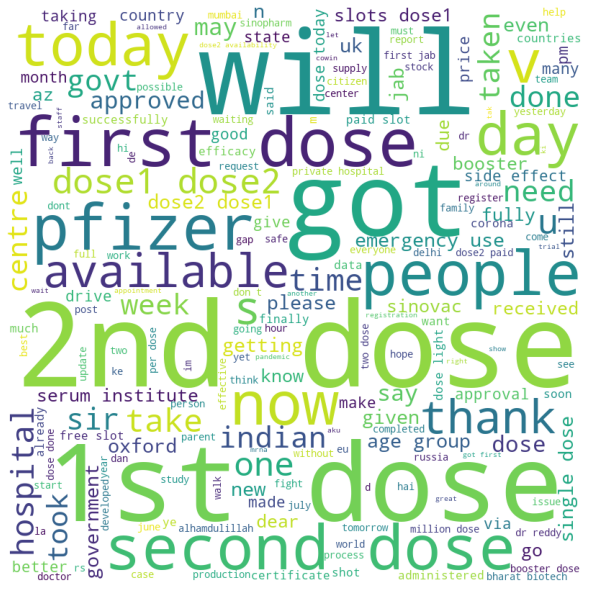

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()